WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


(1e-06, 0.12199974991312137)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta_group1, beta_group2]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 2 seconds.


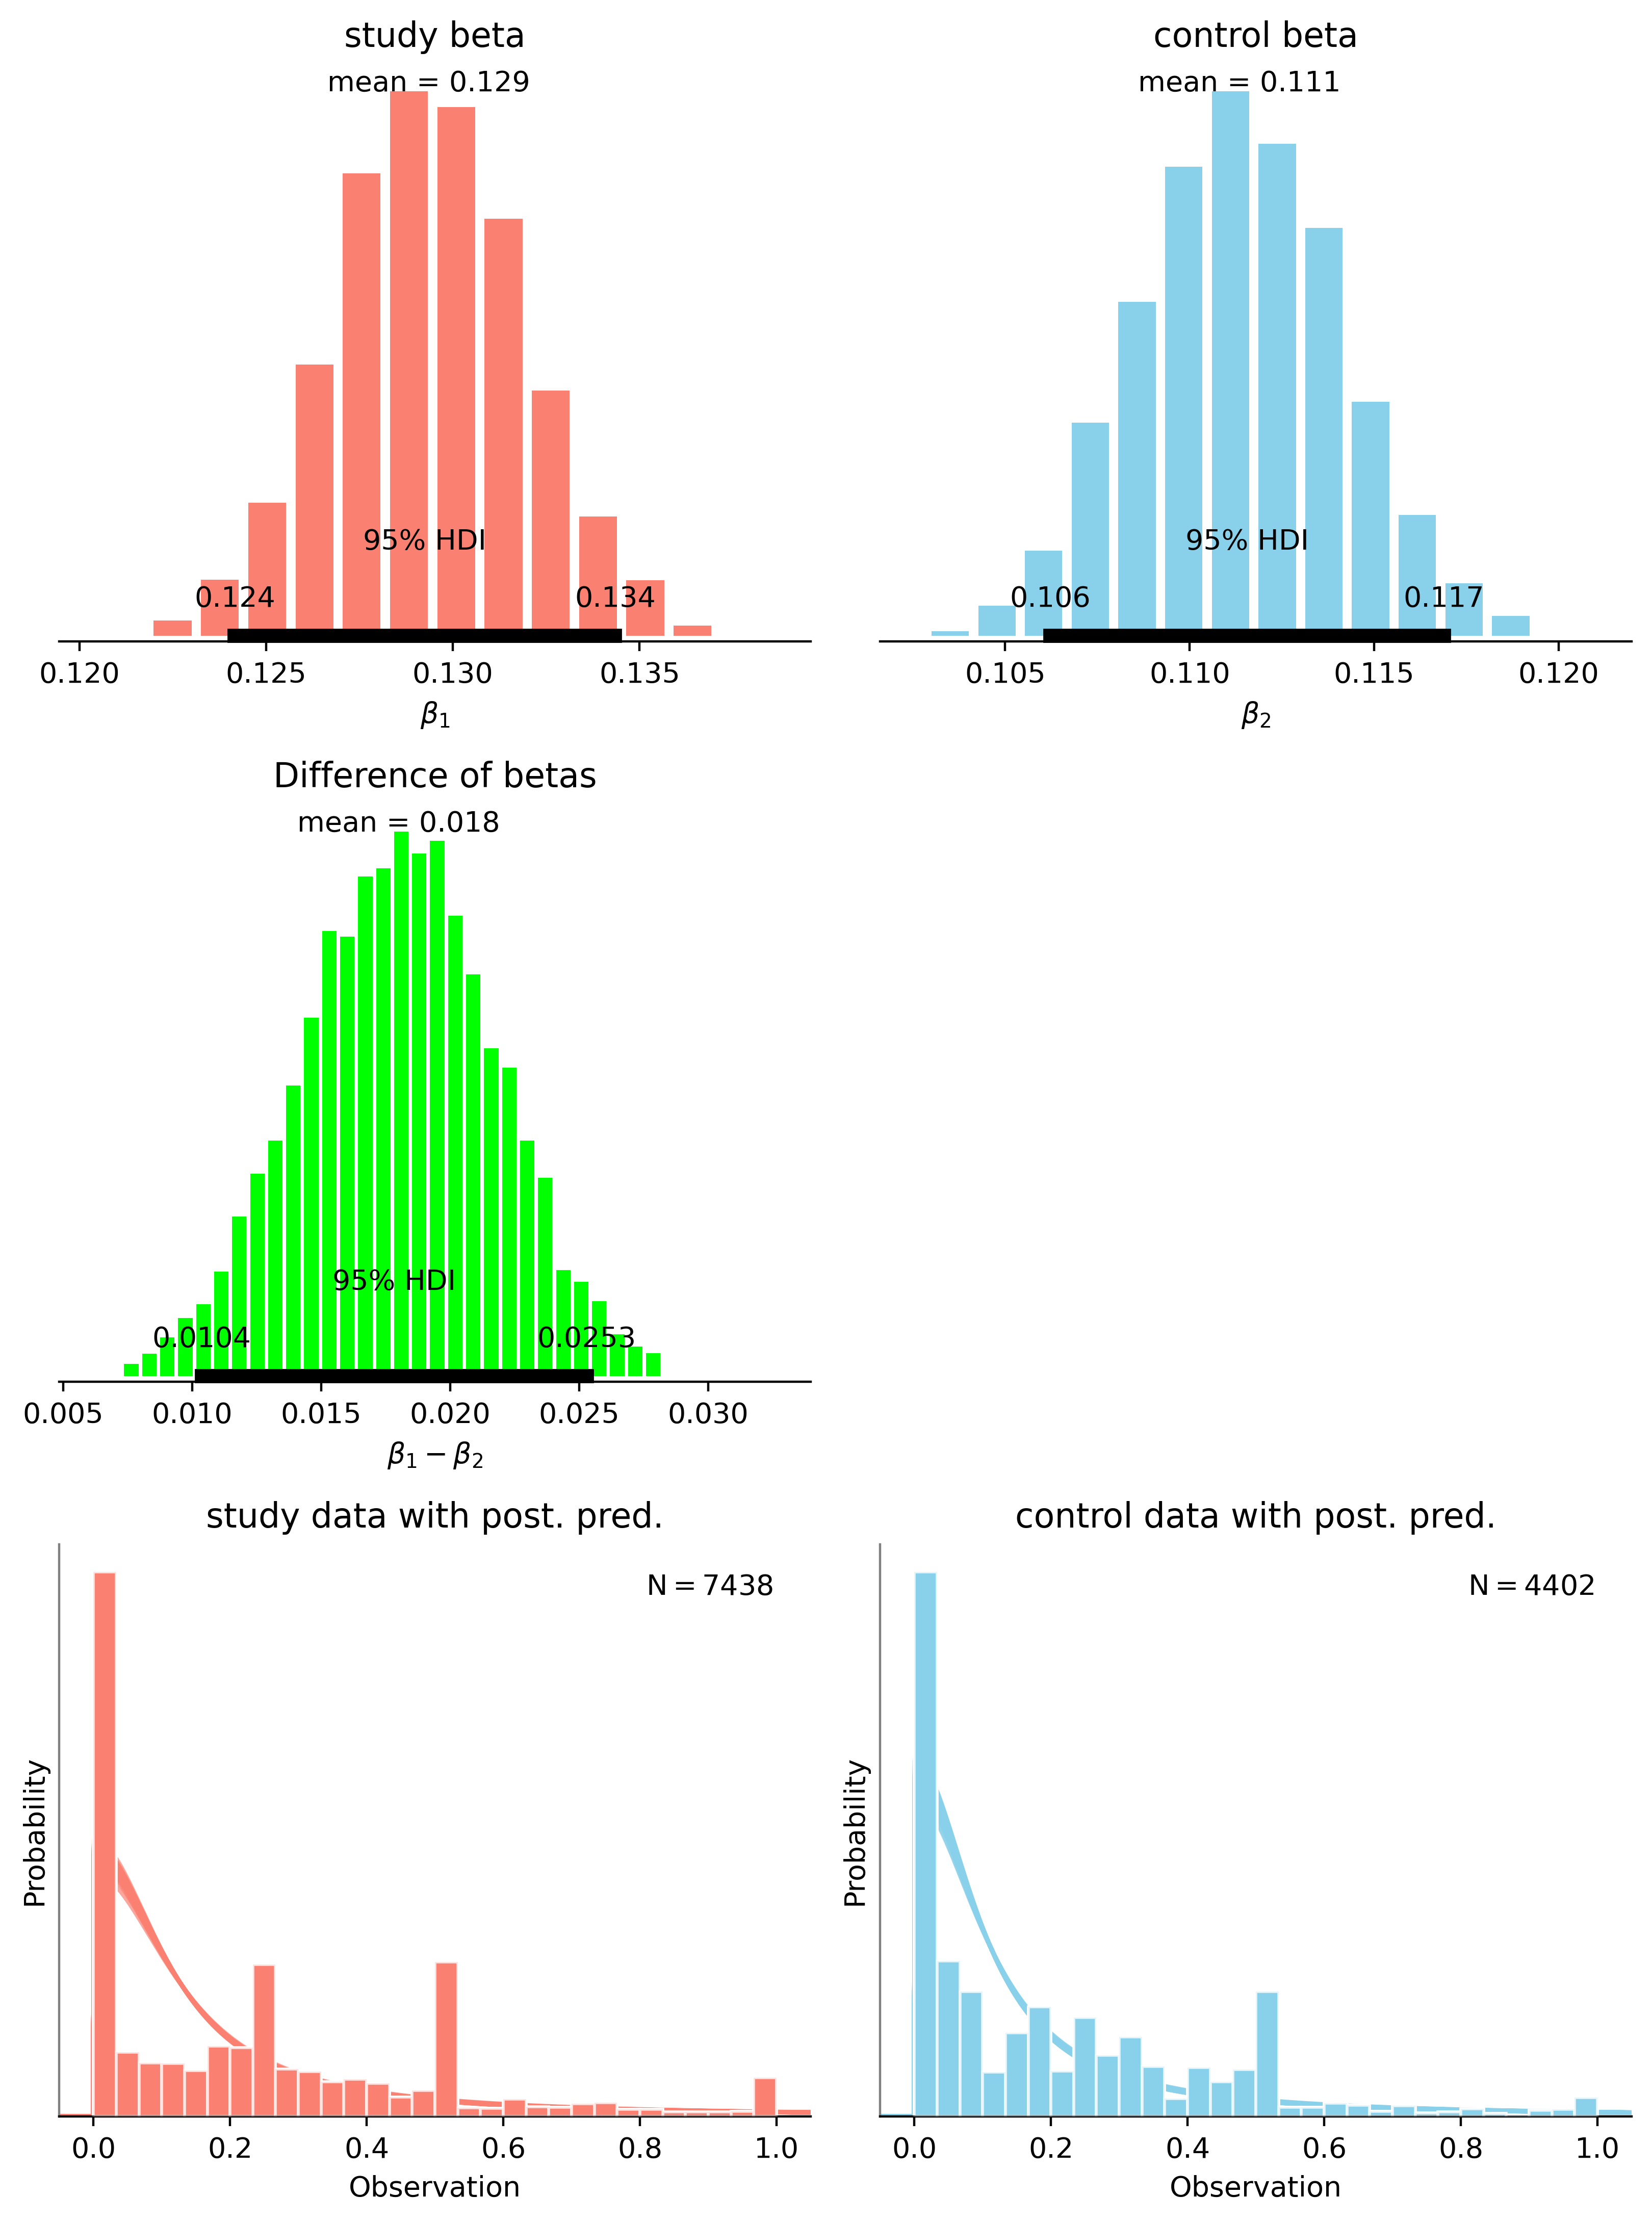

In [1]:
from bayes_test import BayesianHypothesisTestHalfCauchy
import pandas as pd
import numpy as np

draws = 2000

study = np.load('group1.npy')

control = np.load('group2.npy')

""" This should only be used if there is positive skew where many values cut off at 0.
Check distribution of the groups. If there is negative skew
 you will need to reverse by max(data) subtract data, so that it becomes positive skew.
 If you have positive skew but there is a defined cut-off, then transform the data towards 0"""

#study = np.max(study) - study
#control = np.max(control) - control


df1 = pd.DataFrame({'IQ' : control})
df2 = pd.DataFrame({'IQ' : study})
df1['group'] = 'control'
df2['group'] = 'study'

df = pd.concat([df1,df2])

study_test = BayesianHypothesisTestHalfCauchy(df=df,
                                   group1_name='study',
                                   group2_name='control',
                                   value_column='IQ',
                                   category_column='group')
study_test.run_model(draws)
study_test.plot_results()

In [2]:
study_test.value_storage

{'beta_group1': {'mean': 0.14299114738541618,
  'hdi_min': 0.13906548332330268,
  'hdi_max': 0.146909029212131},
 'beta_group2': {'mean': 0.11725466205576786,
  'hdi_min': 0.11249621701648146,
  'hdi_max': 0.12195459703596594},
 'alpha_group1': {'mean': 0.13623916796997915,
  'hdi_min': 0.12960765739788085,
  'hdi_max': 0.14226464872684072},
 'alpha_group2': {'mean': 0.10333298211528014,
  'hdi_min': 0.09697573587588,
  'hdi_max': 0.1099241076964189},
 'diff_beta': {'mean': 0.025744767731166882,
  'hdi_min': 0.019772606708512108,
  'hdi_max': 0.03223238700156647},
 'diff_alpha': {'mean': 0.03291544724956513,
  'hdi_min': 0.0242016366689633,
  'hdi_max': 0.042334680673380184}}